___
<img style="float: left; margin: 30px 15px 15px 15px;" src="https://d33wubrfki0l68.cloudfront.net/4ec62c1c925a380c912ddad740d18554c6822a11/fabe4/img/sponsors/iteso-university.png" width="300" height="500" />
    
    
### <font color='navy'> Modelado de pronóstico de series de tiempo

**Nombres:**
- Judith Alejandra Hinojosa Rábago
- Xander Gallegos Velica
- Christa Itzel Barrios Martinez

**Fecha:** 2 de mayo del 2024.

**Expedientes:**
- 737456
- 737989
- 739328

**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: [https://github.com/judith-ale/proyecto_modulo1](https://github.com/judith-ale/proyecto_modulo1)

# Proyecto Final: Detección de anomalías para el sistema de unidades de producción de aire de un tren

## Tabla de contenidos

- [Portada](#Modelado-de-pronóstico-de-series-de-tiempo)
- [1 Objetivos](#1-Objetivos-[volver])
  - [1.1 Objetivo general](#1.1-Objetivo-general)
  - [1.2 Objetivos específicos](#1.2-Objetivos-específicos)
- [2 Definición del problema](#2-Definición-del-problema-[volver])
- [3 Nodos y variables](#3-Nodos-y-variables-[volver])
- [4 Obtención de la base de datos](#4-Obtención-de-la-base-de-datos-[volver])
- [5 Desarrollo](#5-Desarrollo-[volver])
- [6 Visualización de resultados](#6-Visualización-de-resultados-[volver])
- [7 Conclusiones](#7-Conclusiones-[volver])
- [8 Referencias](#8-Referencias-[volver])

***

## 1 Objetivos [<small>[volver]</small>](#Contenido)


### 1.1 Objetivo general
>  - Desarrollar modelos para la predicción del mantenimiento para el sistema de compresores del tren utilizando series temporales , con el fin de mejorar las técnicas de mantenimiento para el transporte y reducir los costos a falsas alarmas.

### 1.1 Objetivos específicos

>  - Identificar y explorar los datos de para comprender los patrones y estartegias que pueden presentarse en los datos.

>  - Implementar modelos de predicción de series temporales lineales (SARIMAX) para identificar las fallas en el sistema de compresores.

>  - Desarrollar y ajustar modelos de aprendizaje profundo (MLP, CNN, LSTM, etc.) para mejorar la precisión en la detección de fallas.

>  - Aplicar técnicas de clasificación de series temporales para identificar y categorizar las fallas en el sistema de compresores.

>  - Evaluar y comparar el rendimiento de los modelos implementados en términos de precisión, sensibilidad y especificidad.
***

***

## 2 Definición del problema [<small>[volver]</small>](#Contenido)
> Unidad de Producción de Aire, como una de las partes más importantes del compresor, convierte la energía eléctrica de un motor en energía cinética mediante la compresión y presurización del aire. El compresor bombea aire hacia el tubo de frenado que es consumido por acciones como frenar, abrir y cerrar puertas y el uso del biorreactor. Por lo tanto, el rendimiento de la APU es muy crítico y si falla (debido a averías), el equipo no recibe el suministro de aire comprimido consecuentemente.

> Aquí, consideramos datos de un conjunto de sensores analógicos y digitales instalados en un sistema APU que pueden utilizarse para detectar cambios en tiempo real en el rendimiento de la APU. Mientras que los datos recopilados por los sensores analógicos son valores reales, los recopilados por los sensores digitales son valores binarios. El esquema de la APU con la posición de los sensores se describe en la Figura 4, y los sensores se enumeran como

***

## 3 Nodos y variables [<small>[volver]</small>](#Contenido)
> En este apartado el objetivo es identificar los problemas que se van a abordar, para examinar la factibilidad y viabilidad de la simulación de los nodos escogidos. Posteriormente se debe de argumentar del porqué de los nodos escogidos.

***

## 4 Obtención de la base de datos [<small>[volver]</small>](#Contenido)

> El tercer paso del proyecto es indicar de dónde se obtendrán las bases de datos, que indican como se han comportado las variables que identificaste en tu proceso de negocio que vas a simular. En esta investigación debes haber encontrado información propia de la empresa, organización o institución que vas a simular y otra parte de la información debe provenir de investigación que realices en fuentes de información públicas o privadas como las que tiene SECOBI, ahí normalmente y dependiendo del problema elegido, se investigan variables económicas, como tasas de interés, inflación, tipo de cambio, etc., de varios años, por poner un ejemplo.

Los datos fueron obtenidos del repositorio de datos UC Irvine llamado [MetroPT-3 Dataset](https://archive.ics.uci.edu/dataset/791/metropt+3+dataset).

De acuerdo con la página web: desde un tren del metro en un contexto operativo, se recopilaron lecturas de presión, temperatura, corriente del motor y válvulas de admisión de aire de la Unidad de Producción de Aire (APU) de un compresor. Este conjunto de datos revela desafíos reales de mantenimiento predictivo encontrados en la industria.

El conjunto de datos fue recopilado para apoyar el desarrollo de modelos de mantenimiento predictivo, detección de anomalías y predicción del tiempo de vida útil restante (RUL) para compresores utilizando métodos de aprendizaje profundo y aprendizaje automático.

Consiste en datos de series temporales multivariadas obtenidos de varios sensores analógicos y digitales instalados en el compresor de un tren. Los datos abarcan desde febrero hasta agosto de 2020 e incluyen 15 señales, como presiones, corriente del motor, temperatura del aceite y señales eléctricas de las válvulas de admisión de aire. El monitoreo y registro de eventos de equipos industriales, como el comportamiento temporal y los eventos de falla, se obtuvieron a partir de registros generados por los sensores. Los datos se registraron a 1Hz mediante un dispositivo integrado a bordo.

Información de atributos:
El conjunto de datos consta de 15,169,480 puntos de datos recopilados a 1Hz de febrero a agosto de 2020 y está descrito por 15 características de 7 sensores analógicos (1-7) y 8 sensores digitales (8-15):

|No. | Nombre de variable | Atributo              | Descripción                                                                                                     |
|-----|-----|-----------------------|-----------------------------------------------------------------------------------------------------------------|
| 1 | `TP2`   | TP2 (bar)             | La medida de la presión en el compresor.                                                                       |
| 2 | `TP3`   | TP3 (bar)             | La medida de la presión generada en el panel neumático.                                                        |
| 3 | `H1`   | H1 (bar)              | La medida de la presión generada </br>debido a la caída de presión cuando ocurre la descarga del filtro </br>ciclónico.  |
| 4 | `DV_pressure`   | Presión DV (bar)      | La medida de la caída de </br>presión generada cuando las torres descargan aire seco; una lectura de cero </br>indica que el compresor está funcionando bajo carga.                      |
| 5 | `Reservoirs`   | Depósitos (bar)       | La medida de la presión aguas </br>abajo de los depósitos, que debería estar cerca de la presión del panel </br>neumático (TP3).  |
| 6 | `Motor_current`   | Corriente del Motor (A) | La medida de la corriente </br>de una fase del motor trifásico; presenta valores cercanos a 0A - cuando está </br>apagado, 4A - cuando está funcionando sin carga, 7A - cuando está </br>funcionando bajo carga, y 9A - cuando comienza a </br>funcionar.                                                      |
| 7 | `Oil_temperature`   | Temperatura del Aceite (ºC) | La medida de la temperatura del aceite en el </br>compresor.                                                      |
| 8 | `COMP`   | COMP                  | La señal eléctrica de la válvula de </br>admisión de aire en el compresor; está activa cuando no hay admisión de aire, </br>lo que indica que el compresor está apagado o funcionando en </br>estado sin carga.                                  |
| 9 | `DV_eletric`   | DV Eléctrica          | La señal eléctrica que </br>controla la válvula de salida del compresor; está activa cuando el compresor </br>está funcionando bajo carga e inactiva cuando el compresor </br>está apagado o funcionando en estado sin carga.                                      |
| 10 | `Towers`  | Torres                | La señal eléctrica que define la </br>torre responsable de secar el aire y la torre responsable de drenar la </br>humedad eliminada del aire; cuando no está activa, indica que la torre uno </br>está funcionando; cuando está activa, indica que la torre dos está en </br>funcionamiento.                                            |
| 11 | `MPG`  | MPG                   | La señal eléctrica responsable de </br>arrancar el compresor bajo carga activando la válvula de admisión cuando la </br>presión en la unidad de producción de aire (APU) cae por debajo de </br>8.2 bar; activa el sensor COMP, que asume el mismo comportamiento que el sensor </br>MPG.                                          |
| 12 | `LPS`  | LPS                   | La señal eléctrica que detecta y se activa cuando la presión cae por debajo de 7 bares.                         |
| 13 | `Pressure_switch`  | Interruptor de Presión | La señal eléctrica que detecta la descarga en las torres de secado de </br>aire.                                     |
| 14 | `Oil_level`  | Nivel de Aceite       | La señal eléctrica que detecta </br>el nivel de aceite en el compresor; está activa cuando el aceite está por </br>debajo de los valores esperados.                                              |
| 15 | `Caudal_impulses`  | Impulso de Caudal     | La señal eléctrica que </br>cuenta las salidas de pulso generadas por la cantidad absoluta de aire que </br>fluye desde la APU hacia los depósitos. |




## 5 Desarrollo [<small>[volver]</small>](#Contenido)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/2024A/MPST

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/2024A/MPST


In [ ]:
pip install pmdarima

### Importación de librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from utils import LinearForecast

# Ignorar warnings
import warnings
warnings.filterwarnings("ignore")

seed = 19

np.random.seed(seed)

### Descripción general del dataset

In [ ]:
data = pd.read_csv("data/MetroPT3(AirCompressor).csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516948 entries, 0 to 1516947
Data columns (total 17 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1516948 non-null  int64  
 1   timestamp        1516948 non-null  object 
 2   TP2              1516948 non-null  float64
 3   TP3              1516948 non-null  float64
 4   H1               1516948 non-null  float64
 5   DV_pressure      1516948 non-null  float64
 6   Reservoirs       1516948 non-null  float64
 7   Oil_temperature  1516948 non-null  float64
 8   Motor_current    1516948 non-null  float64
 9   COMP             1516948 non-null  float64
 10  DV_eletric       1516948 non-null  float64
 11  Towers           1516948 non-null  float64
 12  MPG              1516948 non-null  float64
 13  LPS              1516948 non-null  float64
 14  Pressure_switch  1516948 non-null  float64
 15  Oil_level        1516948 non-null  float64
 16  Caudal_impulses  1

#### Correlación entre las variables

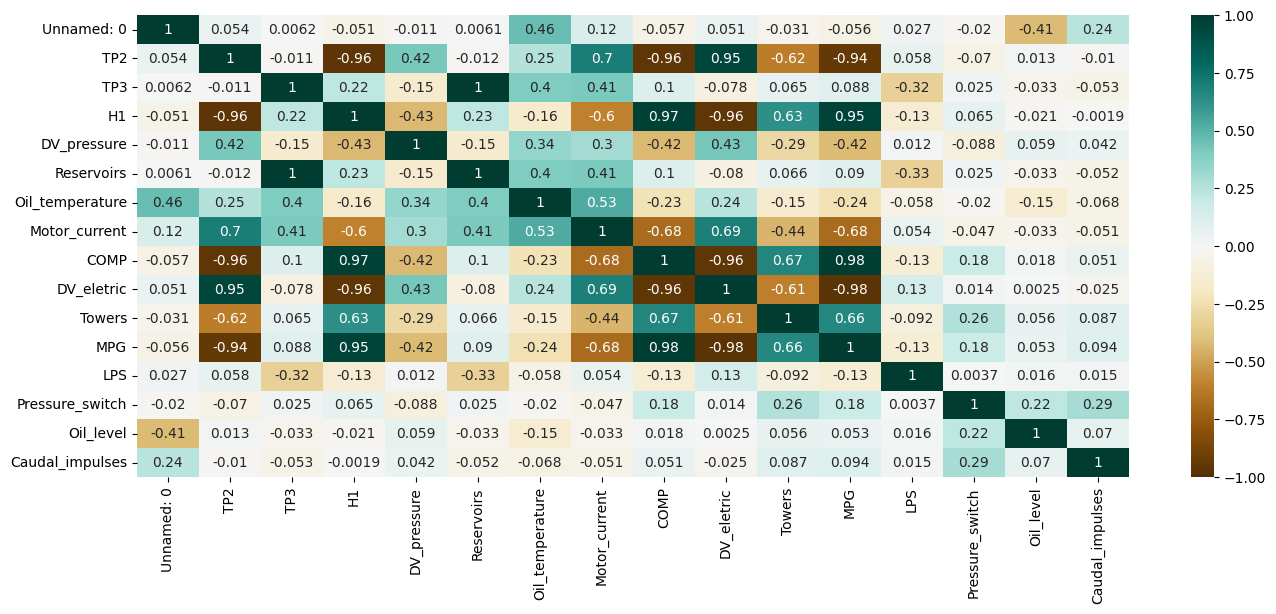

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.drop(columns=['timestamp']).corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.show()

#### Sensores analógicos

In [ ]:
data[['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature', 'Motor_current']].describe().round(3)

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current
count,1516948.000,1516948.000,1516948.000,1516948.000,1516948.000,1516948.000,1516948.000
mean,1.368,8.985,7.568,0.056,8.985,62.644,2.050
std,3.251,0.639,3.333,0.382,0.638,6.516,2.302
min,-0.032,0.730,-0.036,-0.032,0.712,15.400,0.020
25%,-0.014,8.492,8.254,-0.022,8.494,57.775,0.040
50%,-0.012,8.960,8.784,-0.020,8.960,62.700,0.045
75%,-0.010,9.492,9.374,-0.018,9.492,67.250,3.808
max,10.676,10.302,10.288,9.844,10.300,89.050,9.295


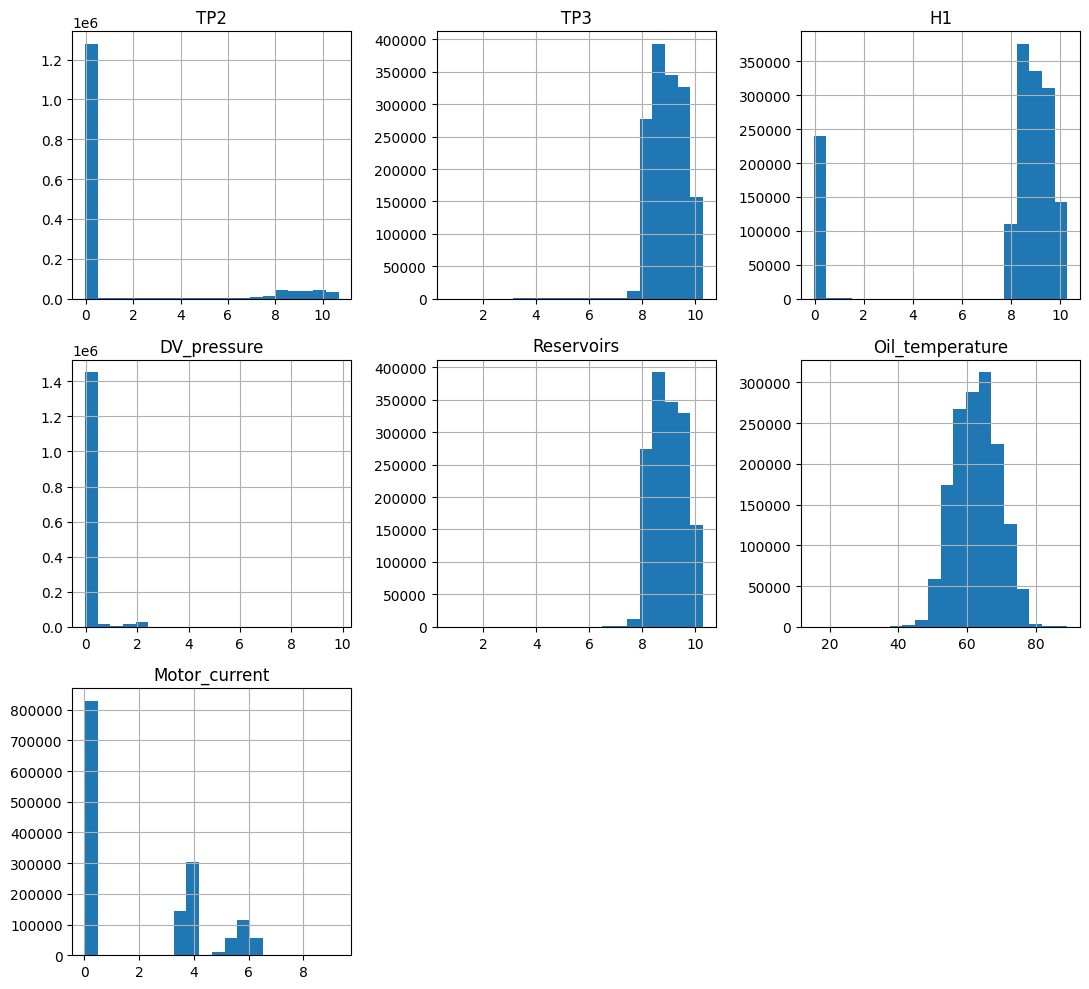

In [ ]:
data[['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature', 'Motor_current']].hist(figsize=(11, 10), bins=20)
plt.tight_layout()

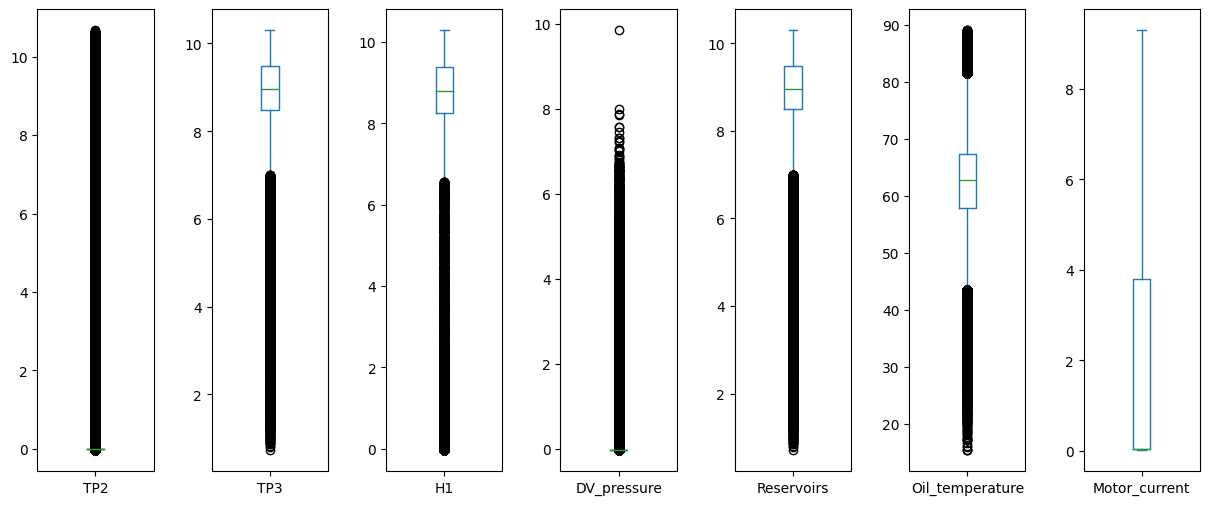

In [ ]:
data[['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature', 'Motor_current']].plot(
    kind='box',
    subplots=True,
    sharey=False, sharex=False,
    figsize=(15, 6)
)

# increase spacing between subplots
plt.subplots_adjust(wspace=0.5)
plt.show()

#### Sensores digitales

In [ ]:
data[['COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses']].describe().round(3)

,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
count,1516948.000,1516948.000,1516948.000,1516948.000,1516948.000,1516948.000,1516948.000,1516948.000
mean,0.837,0.161,0.920,0.833,0.003,0.991,0.904,0.937
std,0.369,0.367,0.272,0.373,0.058,0.092,0.294,0.243
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,1.000,0.000,1.000,1.000,0.000,1.000,1.000,1.000
50%,1.000,0.000,1.000,1.000,0.000,1.000,1.000,1.000
75%,1.000,0.000,1.000,1.000,0.000,1.000,1.000,1.000
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


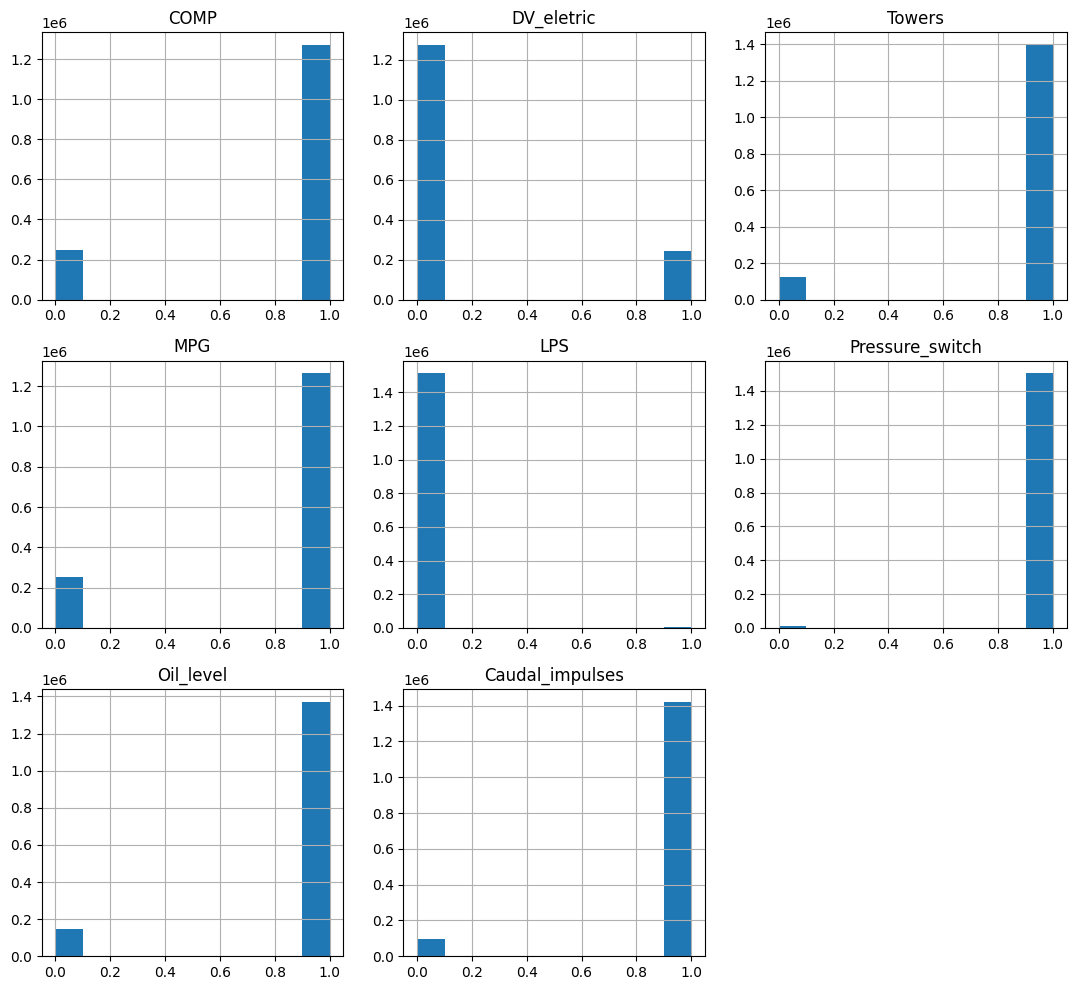

In [ ]:
data[['COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses']].hist(figsize=(11, 10))
plt.tight_layout()

### Limpieza de datos y preprocesamiento

Eliminamos la columna innecesaria

> La columna es un índice que no es utilizado.

In [ ]:
data = data.drop(columns='Unnamed: 0')

#### Transformamos la columna de tiempo en un tipo de variable `datetime`

In [ ]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

#### Añadir columna de variable categórica objetivo

El dataset no tiene el reporte de fallo por lo que es necesario añadirla, la información necesaria se provee en la siguiente tabla:


| Nr. | Hora de Inicio     | Hora de Fin       | Dur. (min)     | Severidad   |
|-----|------------------|------------------|-----------|-------------|
| #1  | 4/12/2020 11:50 | 4/12/2020 23:30 | 700       | Estrés alto |
| #2  | 4/18/2020 00:00 | 4/18/2020 23:59 | 1439      | Estrés alto |
| #3  | 4/19/2020 00:00 | 4/19/2020 01:30 | 90        | Estrés alto |
| #4  | 4/29/2020 03:20 | 4/29/2020 04:00 | 40        | Estrés alto |
| #5  | 4/29/2020 22:00 | 4/29/2020 22:20 | 20        | Estrés alto |
| #6  | 5/13/2020 14:00 | 5/13/2020 23:59 | 599       | Estrés alto |
| #7  | 5/18/2020 05:00 | 5/18/2020 05:30 | 30        | Estrés alto |
| #8  | 5/19/2020 10:10 | 5/19/2020 11:00 | 50        | Estrés alto |
| #9  | 5/19/2020 22:10 | 5/19/2020 23:59 | 109       | Estrés alto |
| #10 | 5/20/2020 00:00 | 5/20/2020 20:00 | 1200      | Estrés alto |
| #11 | 5/23/2020 09:50 | 5/23/2020 10:10 | 20        | Estrés alto |
| #12 | 5/29/2020 23:30 | 5/29/2020 23:59 | 29        | Estrés alto |
| #13 | 5/30/2020 00:00 | 5/30/2020 06:00 | 360       | Estrés alto |
| #14 | 6/01/2020 15:00 | 6/01/2020 15:40 | 40        | Estrés alto |
| #15 | 6/03/2020 10:00 | 6/03/2020 11:00 | 60        | Estrés alto |
| #16 | 6/05/2020 10:00 | 6/05/2020 23:59 | 839       | Estrés alto |
| #17 | 6/06/2020 00:00 | 6/06/2020 23:59 | 1439      | Estrés alto |
| #18 | 6/07/2020 00:00 | 6/07/2020 14:30 | 870       | Estrés alto |
| #19 | 7/08/2020 17:30 | 7/08/2020 19:00 | 90        | Estrés alto |
| #20 | 7/15/2020 14:30 | 7/15/2020 19:00 | 270       | Estrés medio |
| #21 | 7/17/2020 04:30 | 7/17/2020 05:30 | 60        | Estrés alto |


Convertimos los tiempos de inicio y término de las fallas a valores tipo `datetime` con el objetivo de poder comparar por rangos con los datos de la tabla.

In [ ]:
start_time = pd.to_datetime(["2020-04-12 11:50:00", "2020-04-18 00:00:00", "2020-04-29 03:20:00", "2020-04-29 22:00:00", "2020-05-13 14:00:00", "2020-05-18 05:00:00", "2020-05-19 10:10:00", "2020-05-19 22:10:00", "2020-05-23 09:50:00", "2020-05-29 23:30:00", "2020-06-01 15:00:00", "2020-06-03 10:00:00", "2020-06-05 10:00:00", "2020-07-08 17:30:00", "2020-07-15 14:30:00", "2020-07-17 04:30:00"])
end_time = pd.to_datetime(["2020-04-12 23:30:00", "2020-04-19 01:30:00", "2020-04-29 04:00:00", "2020-04-29 22:20:00", "2020-05-13 23:59:00", "2020-05-18 05:30:00", "2020-05-19 11:00:00", "2020-05-20 20:00:00", "2020-05-23 10:10:00", "2020-05-30 06:00:00", "2020-06-01 15:40:00", "2020-06-03 11:00:00", "2020-06-07 14:30:00", "2020-07-08 19:00:00", "2020-07-15 19:00:00", "2020-07-17 05:30:00"])

Creamos una variable llamada failure que almacenará si en ese momento se tiene una falla o no. La variable será binaria, y tendrá el valor de 0 si no hay falla en ese tiempo o de 1 si sí la hay.

In [ ]:
data['failure'] = 0 # Iniciamos la columna con ceros

In [ ]:
# Si se encuentra entre la fecha y hora de inicio y término indicadas se le asigna un 1 a esas filas
for st, et in zip(start_time, end_time):
  data.loc[(data['timestamp'] >= st) & (data['timestamp'] <= et), 'failure'] = 1

Hay un total de 48,650 valores registrados como fallas y 1,468,298 valores sin falla.


In [ ]:
data['failure'].sum(), data['failure'].shape[0] - data['failure'].sum()

(48650, 1468298)

Los datos están imbalanceados. Se tendrá que implementar una técnica para que esto no impacte en el apartado de clasificación.

In [ ]:
data['failure'].sum() / data['failure'].shape[0] * 100, \
(data['failure'].shape[0] - data['failure'].sum()) / data['failure'].shape[0] * 100

(3.2070974087443997, 96.7929025912556)

Hacemos la columna de tiempo el índice del `DataFrame`

In [ ]:
data = data.set_index('timestamp')

### 5.1 Predicción de series de tiempo lineal (SARIMAX).  

> Justificar el uso de la variable oil temperature

Una vez que se tiene la variable a predecir, se lleva a cabo un resampling por hora para tener datos temporales con diferencias constantes de una hora. Se hace un análisis de valores atípicos. Además se lleva a cabo la imputación de los 700 datos faltantes, propagando la última observación válida, hasta la siguiente.

In [ ]:
oil = data['Oil_temperature'].resample('h').mean()
oil.isna().sum()

700

In [ ]:
def investigate_outliers(data):
    data = data.copy()

    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    ll = q1 - 1.5*iqr
    ul = q3 + 1.5*iqr

    num_outliers = data[data < ll].count()  + data[data > ul].count()
    print(f"Found {num_outliers} oulier(s)")

    data[data < ll] = np.nan
    data[data > ul] = np.nan
    return data

In [ ]:
oil = investigate_outliers(oil)
oil = oil.fillna(method='ffill')

Found 41 oulier(s)


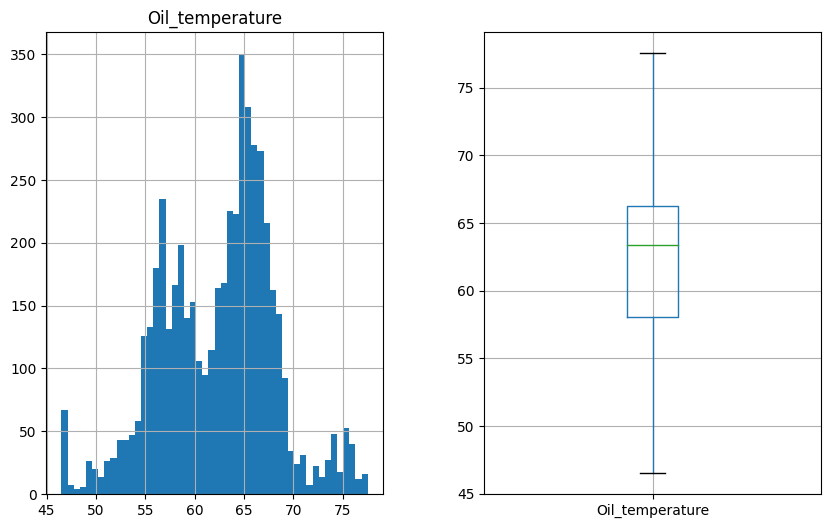

In [ ]:
oil_lf = LinearForecast(pd.DataFrame(oil), x_label='Hour', y_label='OilAvgTemperature')
oil_lf.plot_distribution(figsize=(10 ,6))

In [ ]:
train, test = oil_lf.split_dataset(train_size=0.7)

Se decide dejar los datos sin transformar y unicamente aplicar un Standard Scaler

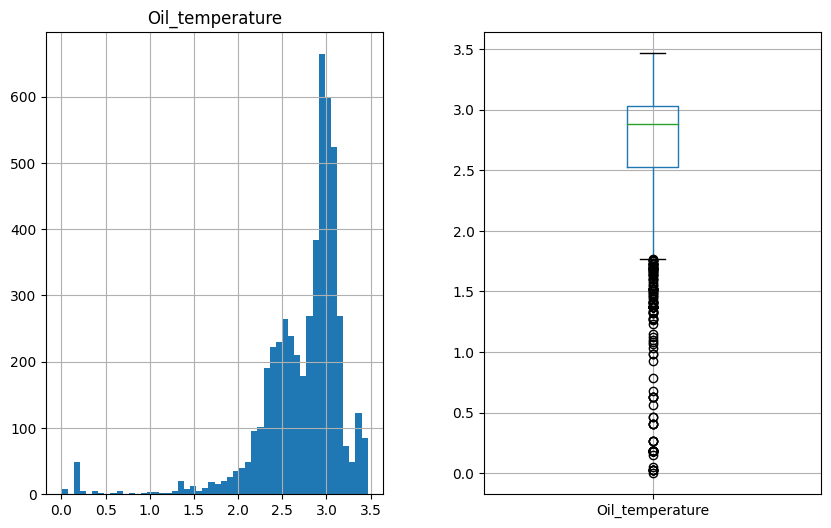

Los datos transformados con log NO tienen una distribución normal


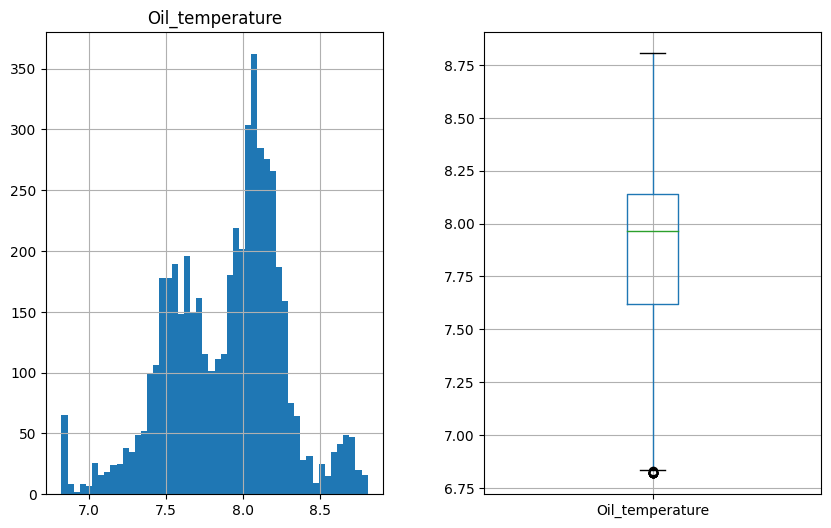

Los datos transformados con sqrt NO tienen una distribución normal


In [ ]:
for m in ['log', 'sqrt']:
  trans = oil_lf.transform(method = m)
  oil_lf.plot_distribution(trans, figsize=(10 ,6))
  if oil_lf.test_normality(trans):
      print(f'Los datos transformados con {m} tienen una distribución normal')
  else:
      print(f'Los datos transformados con {m} NO tienen una distribución normal')

In [ ]:
# Escalamos con el StandardScaler
train = oil_lf.transform(train, method="standard_scaler")
test.iloc[:, 0] = oil_lf.scaler.transform(test)

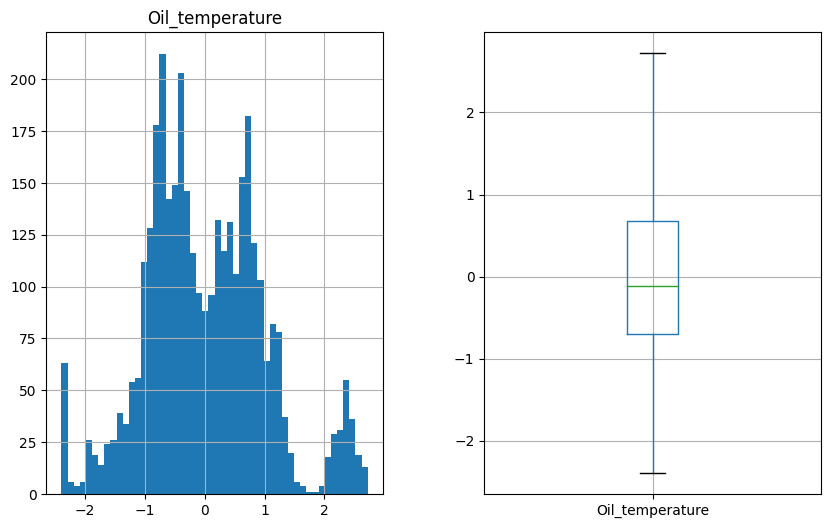

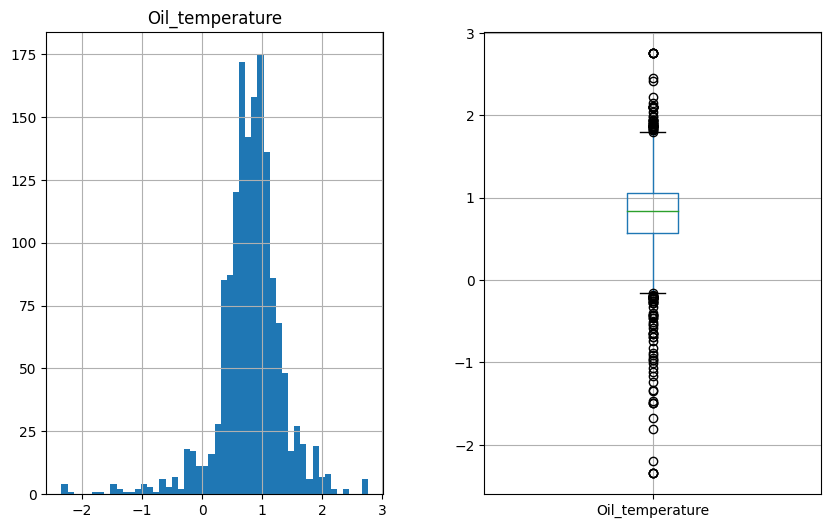

In [ ]:
oil_lf.plot_distribution(train, figsize=(10 ,6))
oil_lf.plot_distribution(test, figsize=(10 ,6))

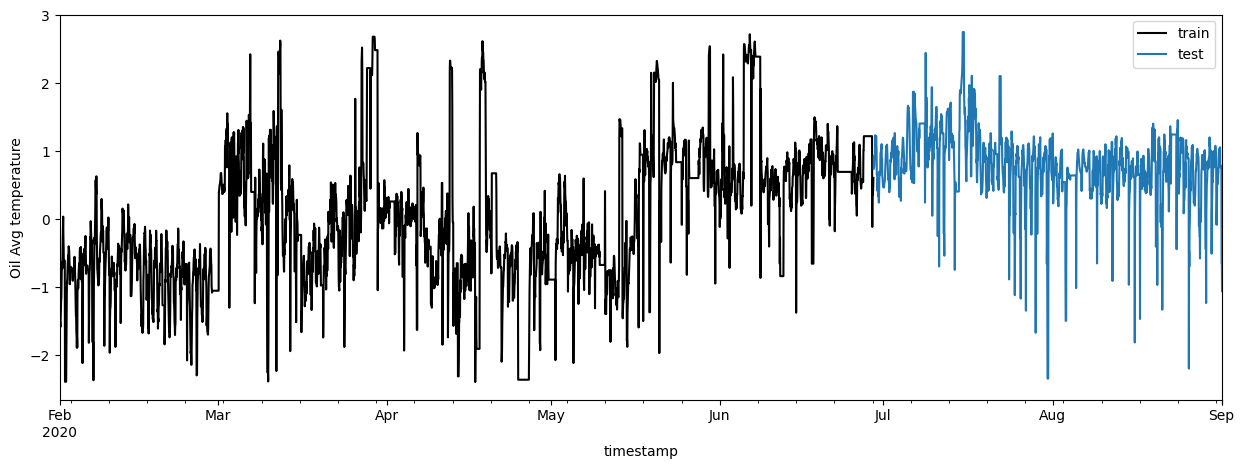

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax = train['Oil_temperature'].plot(color='black', label='train')

ax = test['Oil_temperature'].plot(label='test')

plt.ylabel('Oil Avg temperature')
plt.legend()
plt.show()

In [ ]:
oil_lf.adf_test(train)

Results of Dickey-Fuller Test:
Test Statistic                   -5.025539
p-value                           0.000020
#Lags Used                       18.000000
Number of Observations Used    3562.000000
Critical Value (1%)              -3.432187
Critical Value (5%)              -2.862352
Critical Value (10%)             -2.567202
dtype: float64
Stationary


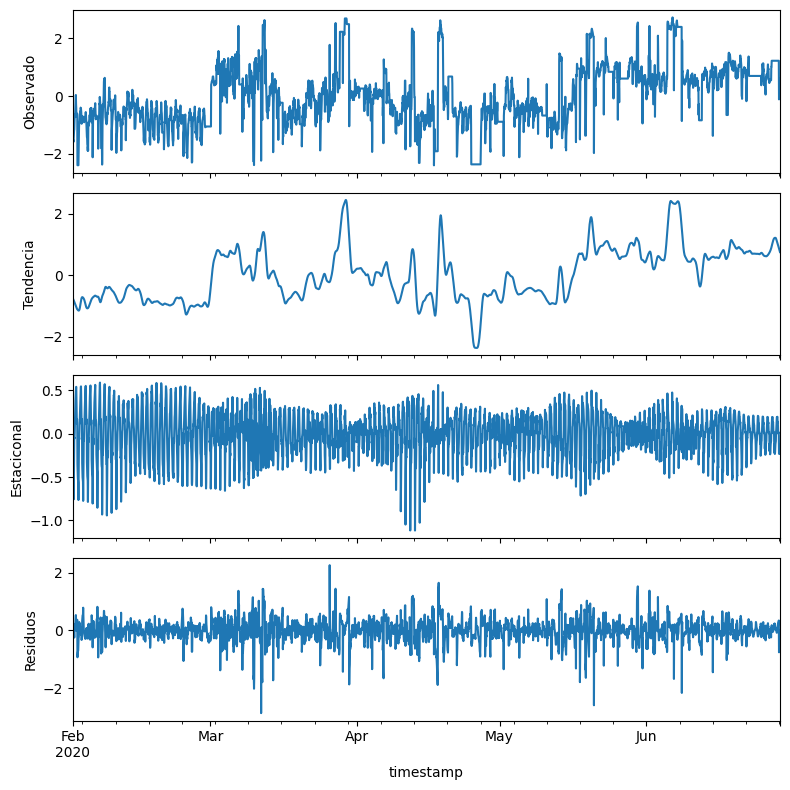

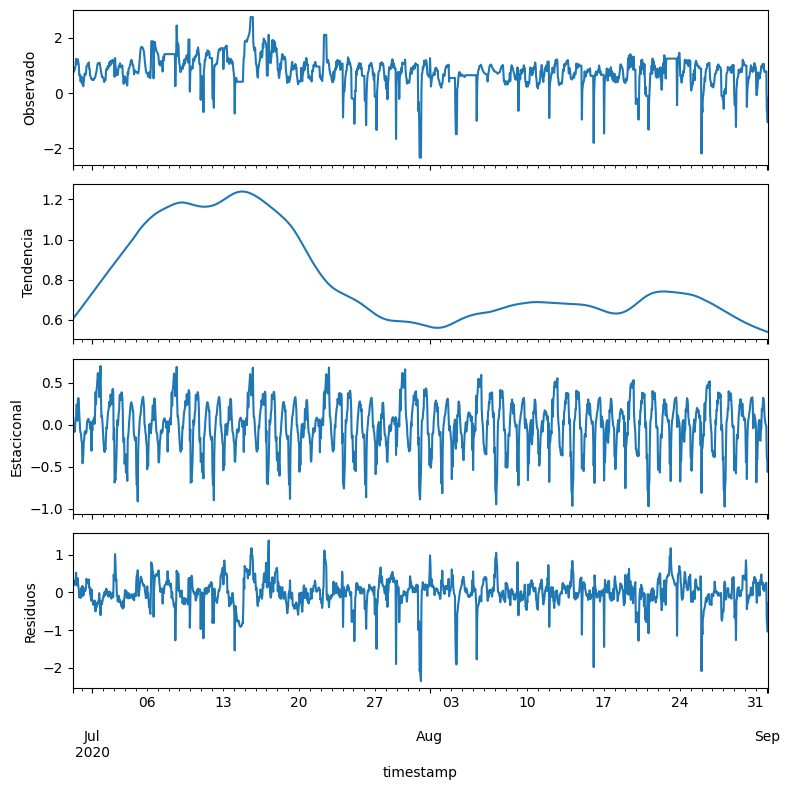

In [ ]:
oil_lf.plot_decomposition(train, periods_seasonality=(24,))
oil_lf.plot_decomposition(test, periods_seasonality=(24*7,))

In [ ]:
decomposition = oil_lf.decompose(train, periods_seasonality=(24*7,))

seasonal_component = decomposition.seasonal
non_seasonal_component = decomposition.observed.copy() - decomposition.seasonal

Componente estacional

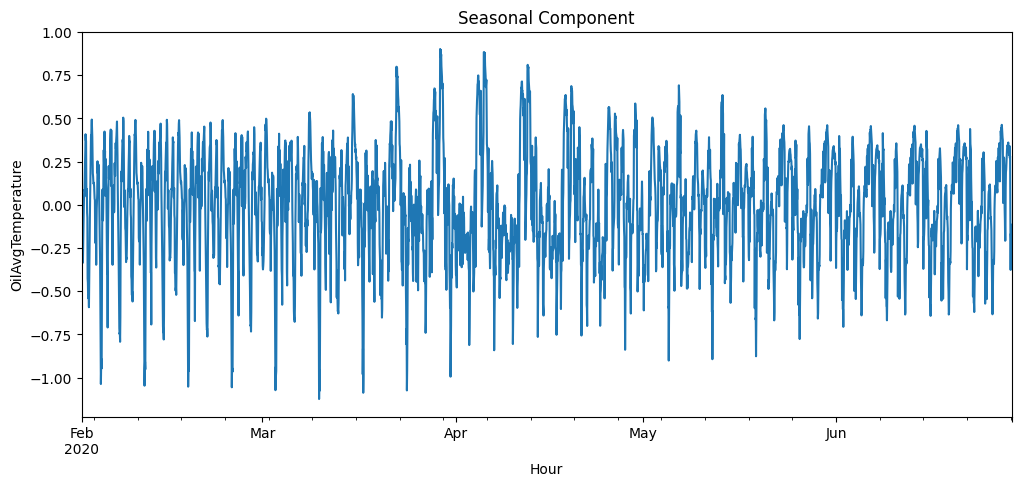

In [ ]:
oil_lf.plot_timeseries(seasonal_component, figsize=(12,5), title='Seasonal Component')

In [ ]:
oil_lf.adf_test(seasonal_component)

Results of Dickey-Fuller Test:
Test Statistic                -1.077405e+01
p-value                        2.344361e-19
#Lags Used                     3.000000e+01
Number of Observations Used    3.550000e+03
Critical Value (1%)           -3.432193e+00
Critical Value (5%)           -2.862355e+00
Critical Value (10%)          -2.567204e+00
dtype: float64
Stationary


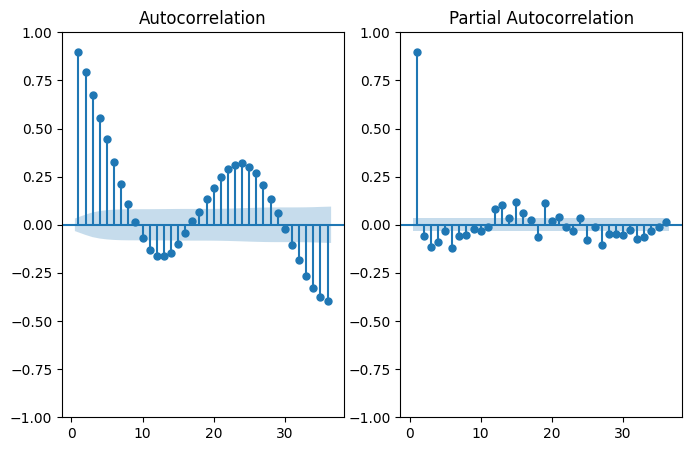

In [ ]:
## AR: Se observa un corte en la autocorrelación parcial a partir del primer periodo
## MA: Se observa un término autorregresivo de orden superior

oil_lf.plot_acf_pacf(seasonal_component)

Componente no estacional



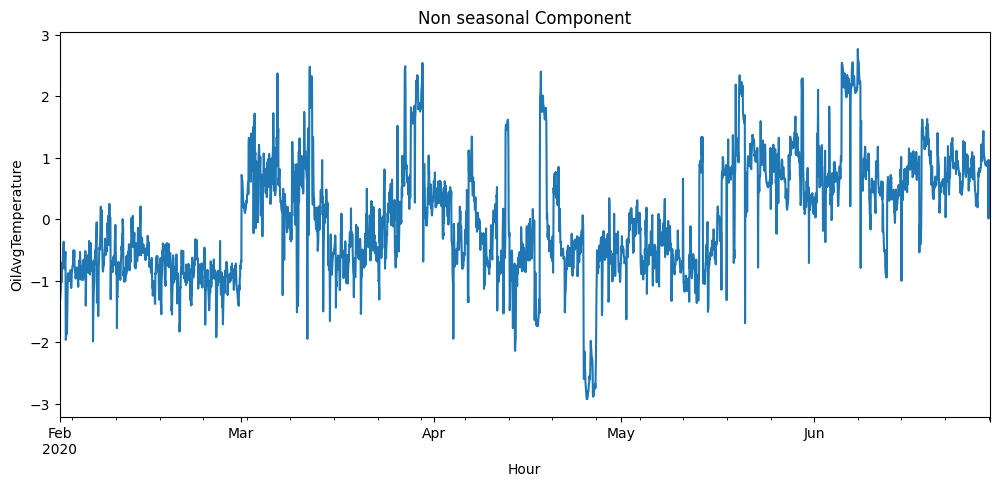

In [ ]:
oil_lf.plot_timeseries(non_seasonal_component, figsize=(12,5), title='Non seasonal Component')

In [ ]:
oil_lf.adf_test(non_seasonal_component)
oil_lf.adf_test(non_seasonal_component.diff().dropna())

Results of Dickey-Fuller Test:
Test Statistic                   -5.517149
p-value                           0.000002
#Lags Used                       13.000000
Number of Observations Used    3567.000000
Critical Value (1%)              -3.432185
Critical Value (5%)              -2.862351
Critical Value (10%)             -2.567202
dtype: float64
Stationary
Results of Dickey-Fuller Test:
Test Statistic                -1.561666e+01
p-value                        1.752572e-28
#Lags Used                     2.600000e+01
Number of Observations Used    3.553000e+03
Critical Value (1%)           -3.432192e+00
Critical Value (5%)           -2.862354e+00
Critical Value (10%)          -2.567203e+00
dtype: float64
Stationary


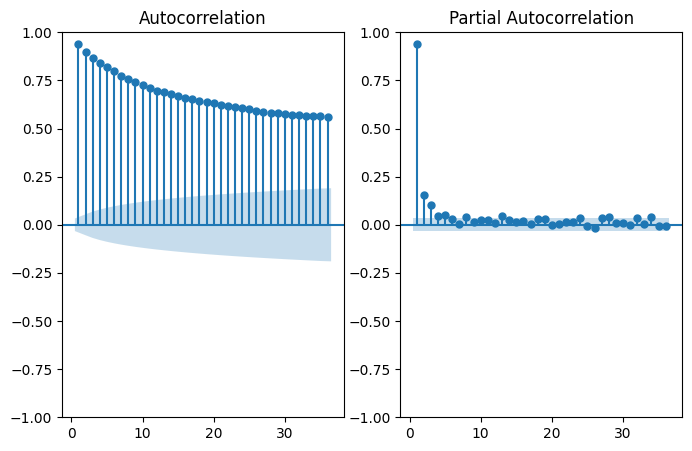

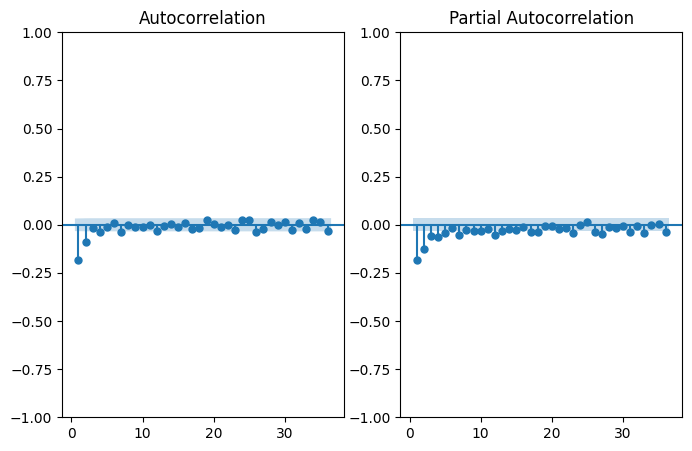

In [ ]:
## Debido a la evidente autocorrelación, se opta por usar un factor de diferenciación 1

## AR: Se observa un corte en la autocorrelación parcial a partir del segundo o tercer periodo
## MA: Se observa un corte en la autocorrelación a partir del segundo periodo

oil_lf.plot_acf_pacf(non_seasonal_component)
oil_lf.plot_acf_pacf(non_seasonal_component.diff().dropna())

Tendencia

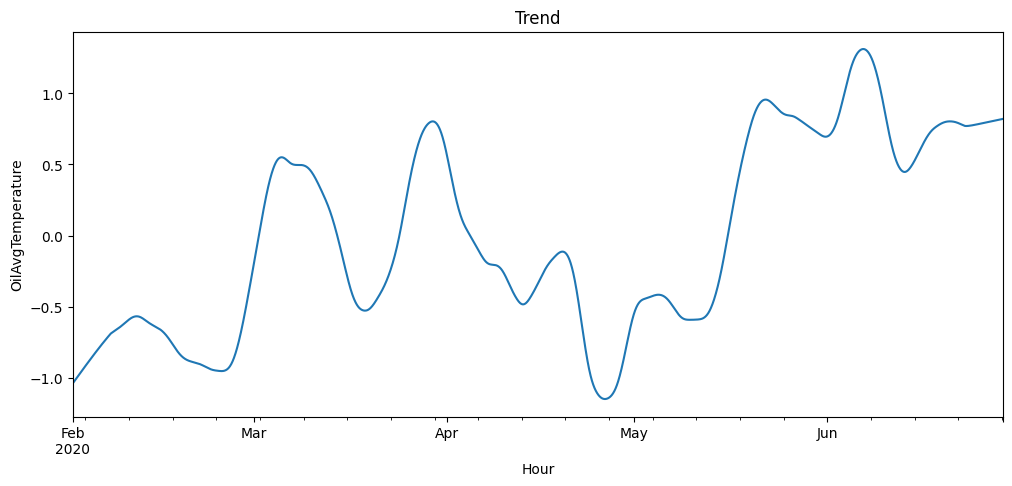

In [ ]:
oil_lf.plot_timeseries(decomposition.trend, figsize=(12,5), title='Trend')

In [ ]:
ls_params = oil_lf.combine_parameters(p = (2, 3),
                                      d = (0,1),
                                      q = (2,),
                                      P = (0, 1 ),
                                      D = (0,),
                                      Q = (0,),
                                      S = (24*7, ),
                                      t = ('n', ))

len(ls_params)

8

In [ ]:
res = oil_lf.search_best_set_params(train, sarimax_params=ls_params)

low_memory
> ((2, 0, 2), (0, 0, 0, 168), 'n'): AIC: 2814.35
low_memory
> ((2, 0, 2), (1, 0, 0, 168), 'n'): AIC: 2777.788
low_memory
> ((2, 1, 2), (0, 0, 0, 168), 'n'): AIC: 2779.644
low_memory
> ((2, 1, 2), (1, 0, 0, 168), 'n'): AIC: 2781.575
low_memory
> ((3, 0, 2), (0, 0, 0, 168), 'n'): AIC: 2815.524
low_memory
> ((3, 0, 2), (1, 0, 0, 168), 'n'): AIC: 2817.42
low_memory
> ((3, 1, 2), (0, 0, 0, 168), 'n'): AIC: 2779.741
low_memory
> ((3, 1, 2), (1, 0, 0, 168), 'n'): AIC: 2781.641


In [ ]:
res

,params,AIC,BIC,LLF
1,"((2, 0, 2), (1, 0, 0, 168), 'n')",2777.787793,2814.888177,-1382.893896
2,"((2, 1, 2), (0, 0, 0, 168), 'n')",2779.643936,2810.559526,-1384.821968
6,"((3, 1, 2), (0, 0, 0, 168), 'n')",2779.741312,2816.840021,-1383.870656
3,"((2, 1, 2), (1, 0, 0, 168), 'n')",2781.575228,2818.673937,-1384.787614
7,"((3, 1, 2), (1, 0, 0, 168), 'n')",2781.641136,2824.922963,-1383.820568
0,"((2, 0, 2), (0, 0, 0, 168), 'n')",2814.350044,2845.267031,-1402.175022
4,"((3, 0, 2), (0, 0, 0, 168), 'n')",2815.524407,2852.624791,-1401.762203
5,"((3, 0, 2), (1, 0, 0, 168), 'n')",2817.420309,2860.70409,-1401.710154


In [ ]:
order = (2, 0, 2)
seasonal_order = (1, 0, 0, 168)
trend = 'n'

In [ ]:
results = oil_lf.fit(train, order=order, seasonal_order=seasonal_order, trend=trend)

low_memory


In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                      Oil_temperature   No. Observations:                 3581
Model:             SARIMAX(2, 0, 2)x(1, 0, [], 168)   Log Likelihood               -1382.894
Date:                              Thu, 09 May 2024   AIC                           2777.788
Time:                                      14:10:16   BIC                           2814.888
Sample:                                  02-01-2020   HQIC                          2791.013
                                       - 06-29-2020                                         
Covariance Type:                             approx                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8690      0.017    108.095      0.000       1.835       1.903
ar.L2         -0.8697      0.017    -51.062      0.000      -0.903      -0.836
ma.L1         -1.0695      0.025    -43.196      0.000      -1.118      -1.021
ma.L2          0.0983      0.020      4.877      0.000       0.059       0.138
ar.S.L168     -0.0034      0.017     -0.202      0.840      -0.036       0.029
sigma2         0.1266      0.003     42.329      0.000       0.121       0.132
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             77574.23
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -1.25
Prob(H) (two-sided):                  0.28   Kurtosis:                        25.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

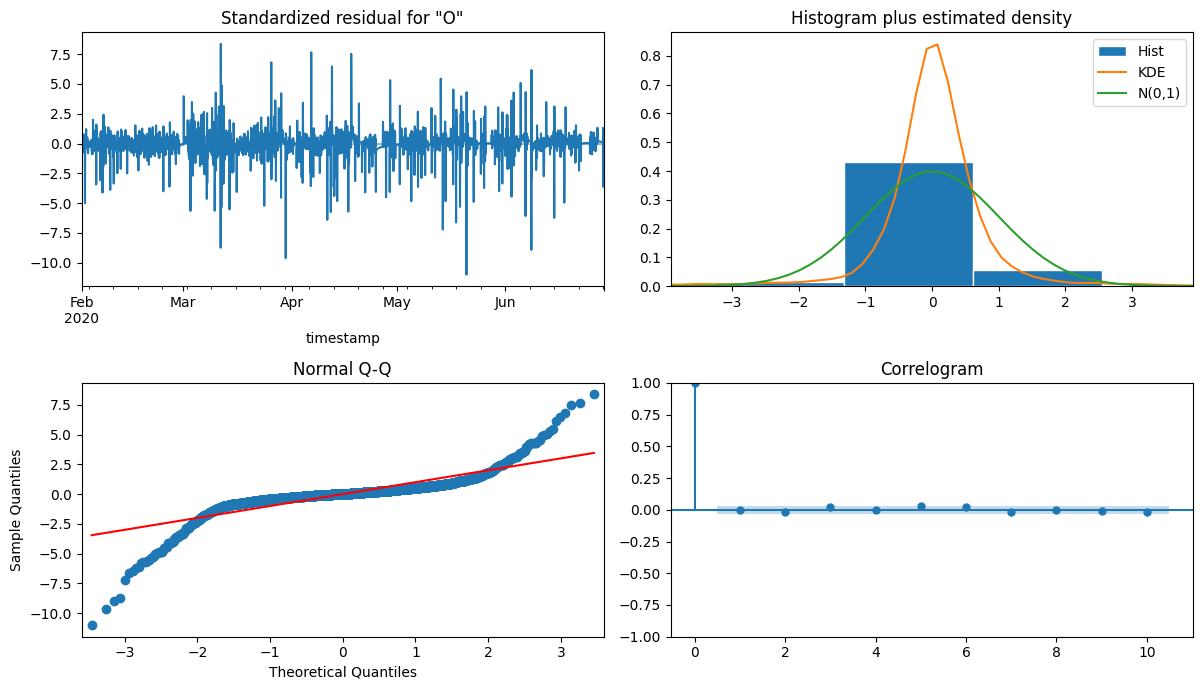

In [ ]:
# Gráfico de los diagnósticos para los residuos
results.plot_diagnostics(figsize=(12, 7))
plt.tight_layout()

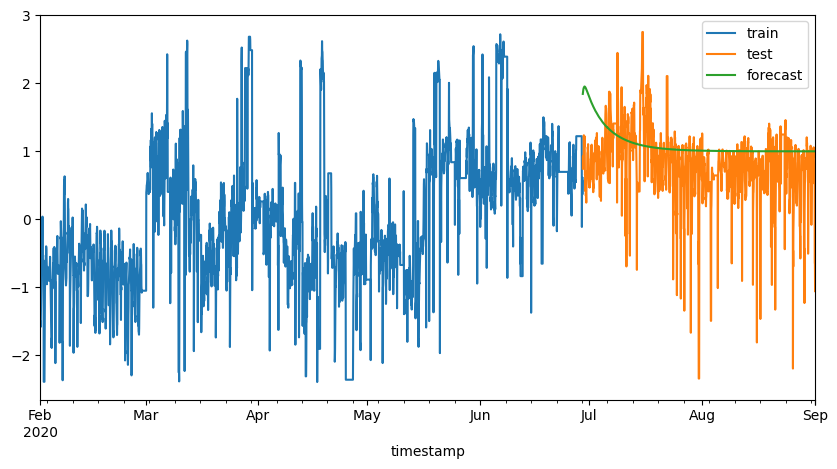

In [ ]:
# Predicción
# Pronóstico
y_h = np.exp(oil_lf.model.predict(start=test.index[0], end=test.index[-1], dynamic=False)).to_frame()
fig, ax = plt.subplots(figsize = (10, 5))
train['Oil_temperature'].plot(ax = ax)
test['Oil_temperature'].plot(ax = ax)
y_h.plot(ax = ax)
ax.legend(labels = ['train', 'test', 'forecast'])
plt.show()

### 5.2 Predicción de series de tiempo no lineal (MLP, CNN, LSTM, etc).



### 5.3 Clasificación de series de tiempo.

***


## 6 Visualización de resultados [<small>[volver]</small>](#Contenido)
> Para cada uno de los temas del curso, realizar la estimación y predicción de errores de los algoritmos propuestos. Al final luego de obtener los resultados de cada tema realizar una comparación de los resultados lineales y no lineales y concluir los distintos resultados.

***

## 7 Conclusiones [<small>[volver]</small>](#Contenido)
> Mucho cuidado, las conclusiones no son cualquier cosa. Se debe concluir respecto a los objetivos planteados de acuerdo a los resultados obtenidos.

***

## 8 Referencias [<small>[volver]</small>](#Contenido)

- Davari, N., Veloso, B., Ribeiro, R. P., Pereira, P. M., & Gama, J. (2021). Predictive maintenance based on anomaly detection using deep learning for air production unit in the railway industry. *2021 IEEE 8th International Conference on Data Science and Advanced Analytics (DSAA)* (pp. 1-10). IEEE. [https://doi.org/10.1109/DSAA53316.2021.9564181](https://doi.org/10.1109/DSAA53316.2021.9564181)
- Davari, N., Veloso, B., Ribeiro, R. P., Pereira, P. M., & Gama, J. (2023). *MetroPT-3 Dataset*. UCI Machine Learning Repository. [https://doi.org/10.24432/C5VW3R](https://doi.org/10.24432/C5VW3R).
